<a href="https://colab.research.google.com/github/TheoLam00/TheoLam00.github.io/blob/main/project/unem/unem%26swing%26voteRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import seaborn as sns

In [29]:
unem = pd.read_csv('https://raw.githubusercontent.com/TheoLam00/TheoLam00.github.io/refs/heads/main/project/unem/Fred-Unemployment.csv')
vote = pd.read_csv('https://raw.githubusercontent.com/TheoLam00/TheoLam00.github.io/refs/heads/main/project/voteRate/voteRatesCleaned.csv')

In [30]:
#calculate average value of unem by 6 month
unem = unem.sort_values(by=['state', 'date'])
unem['6-Month_Avg'] = unem.groupby('state')['value'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())
unem['3-Month_Avg'] = unem.groupby('state')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
unem['year_Avg'] = unem.groupby('state')['value'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

In [31]:
vote['year'] = vote['year'].astype(str)
vote['date'] = vote['year'] + "-11-01"
vote = vote[['state','date','voteRate','swingIndex','demRatio']]

In [32]:
#combine vote to unem
unem = unem.merge(vote, on=['state','date'])
unem = unem.dropna()

In [35]:
#unem to long data
unem = pd.melt(unem, id_vars=['state','date','voteRate','swingIndex','demRatio'], var_name='avg', value_name='rate')

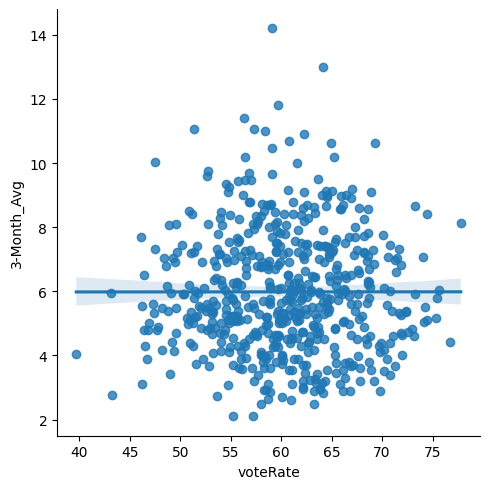

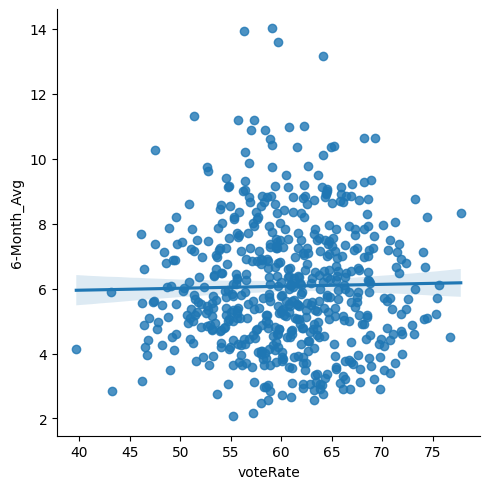

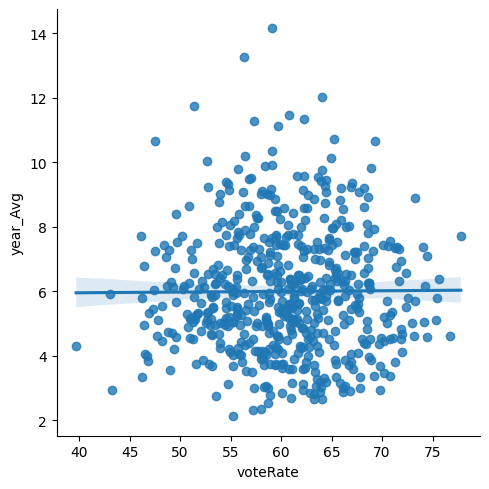

In [ ]:
sns.lmplot(x='voteRate',y='3-Month_Avg',data=unem,fit_reg=True)
sns.lmplot(x='voteRate',y='6-Month_Avg',data=unem,fit_reg=True)
sns.lmplot(x='voteRate',y='year_Avg',data=unem,fit_reg=True)

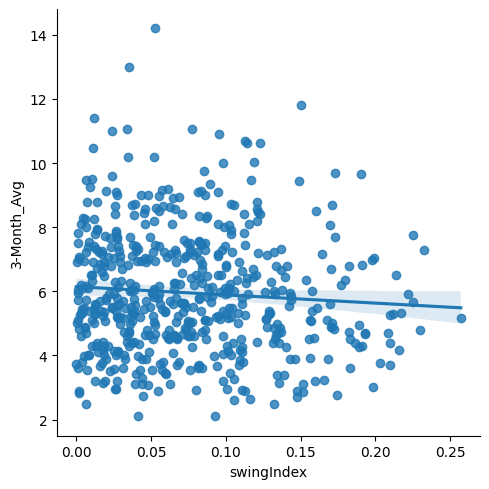

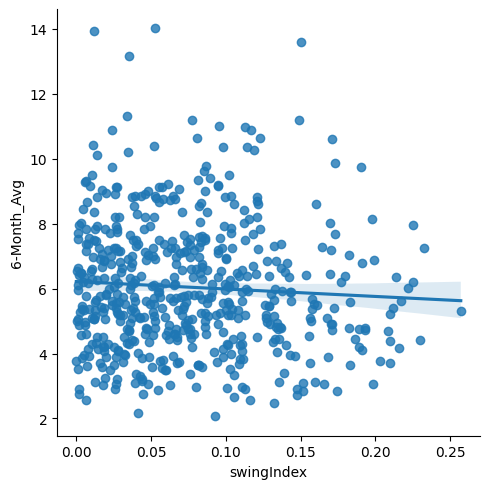

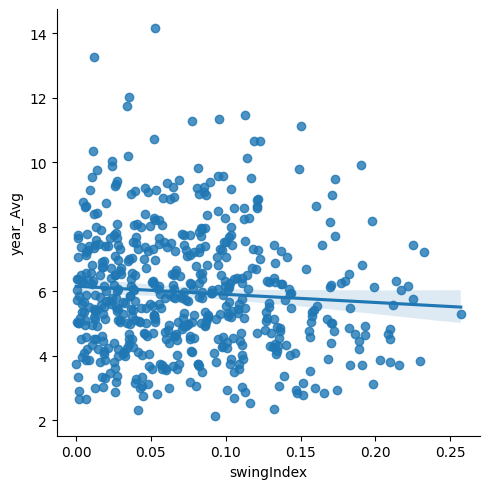

In [ ]:
df = unem[unem['swingIndex']<=0.3]
sns.lmplot(x='swingIndex',y='3-Month_Avg',data=df,fit_reg=True)
sns.lmplot(x='swingIndex',y='6-Month_Avg',data=df,fit_reg=True)
sns.lmplot(x='swingIndex',y='year_Avg',data=df,fit_reg=True)

In [36]:
from google.colab import files
unem.to_csv('unem&swing.csv', encoding = 'utf-8-sig')
files.download('unem&swing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>